In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
%matplotlib inline
import math as ma
import datetime

In [170]:
kpmgf = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
kpmgf.sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [171]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerDemographic',skiprows=1)

In [172]:
df['gender']

0            F
1         Male
2         Male
3         Male
4       Female
         ...  
3995    Female
3996    Female
3997         U
3998      Male
3999      Male
Name: gender, Length: 4000, dtype: object

In [125]:
#df.columns= df.iloc[0]
#df1 = df[1:]
#df

In [181]:
def check_Na():
    ret = []
    tmp = list(df)
    for each in tmp:
        ret.append(df[each].isna().sum())
    return ret

NaNlist = check_Na()
print(NaNlist, len(NaNlist))

df = df.drop(columns =['default'])

[0, 0, 125, 0, 0, 87, 506, 656, 0, 0, 302, 0, 87] 13


In [185]:
df.to_excel(r'Finalfile.xlsx', index = None, header=True)

In [174]:
gender = [0,0,0] #first is Female, second if Male, third is Unknown
for each in df['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1

print(gender)

[2039, 1873, 88]


In [149]:
def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)
bike = [0,0,0]
bike[0] += df['past_3_years_bike
              _related_purchases'][df['gender'] == 'Female'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'F'].sum()
bike[1] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Male'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'M'].sum()
bike[2] += df['past_3_years_bike_related_purchases'][df['gender'] == 'U'].sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.3,0.1,0.4,0.6)

([<matplotlib.axis.XTick at 0x2541805a940>,
 <a list of 6 Text xticklabel objects>)

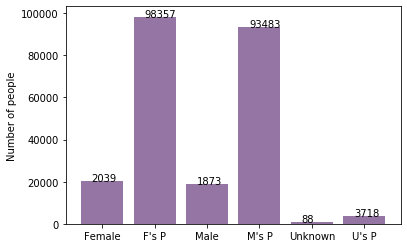

In [175]:
#scale up gender by 10 for easier visualization
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = colorr)
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graphl[i]+0.1, s = grapho[i], size = 10)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))

([<matplotlib.axis.XTick at 0x254163548d0>,
 <a list of 3 Text xticklabel objects>)

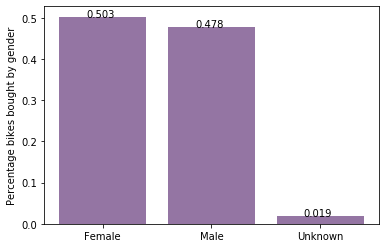

In [151]:
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = colorr)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [166]:
#Analyze on the age vs bikes bought
#Needs to transform
print(df["DOB"][1].ctime().split(" ")[4])
df["Age"] = 0
lenn = len(df["DOB"])
k    = 0
for i in range(1, lenn):
    #type is date
    if isinstance(df["DOB"][i], datetime.date):
        tl = len(df["DOB"][i].ctime().split(" "))
        df["Age"][i] += int(2019 - int(df["DOB"][i].ctime().split(" ")[tl-1]))
    #type is string
    elif isinstance(df["DOB"][i], str):
        tl = len(df["DOB"][i].split("-"))
        df["Age"][i] += int(2019 - int(df["DOB"][i].split("-")[tl-1])) 
    #time is float: means it's nan value so do nothing
print(k)

1980


C:\Users\badol\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


ValueError: NaTType does not support ctime

In [153]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,39
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,65
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,58
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,42


In [167]:
ngenage = [0,0,0]
j = 1
ss = 0
stdv= []

In [155]:
for each in df['gender']:
    print(each[0])
    if each[0] == 'F' and df['Age'][j] != 0:
        ss += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[0] += 1
    elif each[0] == 'M' and df['Age'][j] != 0:
        ss += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[1] += 1
    elif df['Age'][j] != 0: 
        ss += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[2] += 1
    j += 1

F
M
M
M
F
M
F
M
F
F
M
M
M
F
M
M
M
F
F
M
M
F
M
F
M
F
M
M
F
M
F
F
M
U
F
F
F
F
M
F
M
F
F
M
M
F
M
F
M
M
M
M
F
F
M
M
M
F
M
F
F
F
F
M
M
M
M
F
F
M
M
M
F
F
F
F
M
M
F
M
F
F
M
M
M
M
M
F
M
M
M
F
M
M
F
M
M
F
M
M
M
M
F
F
F
M
F
F
M
M
F
F
M
F
M
M
F
M
M
M
M
M
F
F
F
M
F
M
M
M
F
F
M
F
F
M
M
M
M
M
M
M
M
U
M
M
F
F
F
M
M
F
F
F
M
F
M
M
M
M
M
M
F
F
M
M
F
U
M
M
F
M
F
F
M
M
F
M
M
F
F
M
F
M
M
F
M
F
M
F
M
F
M
F
F
M
F
F
F
M
M
F
M
M
M
F
F
M
M
M
F
F
M
M
F
F
F
F
M
F
F
M
M
M
F
M
M
F
M
F
M
F
M
F
F
M
M
M
M
M
M
M
F
M
F
F
F
F
M
M
F
F
F
F
F
F
F
F
F
F
M
M
F
M
M
F
U
F
M
F
F
F
M
F
M
F
F
M
F
M
F
M
F
M
F
M
F
M
F
U
F
F
M
M
F
M
F
M
F
M
F
F
F
M
F
M
M
M
F
F
F
M
M
F
F
F
F
F
F
M
F
F
F
M
F
F
F
F
M
M
M
F
F
F
F
F
F
F
F
M
M
M
F
F
F
M
M
M
F
F
M
M
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
F
M
M
M
F
F
M
M
F
M
F
M
F
F
M
M
F
M
F
M
F
F
M
M
M
M
F
M
F
F
F
M
F
F
M
F
M
F
F
F
M
F
F
F
F
M
M
F
F
F
F
F
M
F
M
M
M
F
F
M
F
F
F
M
M
M
M
M
M
M
M
F
F
F
M
F
F
M
F
F
F
F
F
U
F
U
U
M
M
F
M
F
F
F
F
F
F
F
M
M
F
M
M
F
F
M
F
M
M
F
F
F
U
F
M
M
M
F
F
F
F
F
F
M
M
F
M
M
F
F
F
M
M


KeyError: 4000

In [168]:
print(ss)

0


In [157]:
print (ngenage)

[60, 81, 1]


In [158]:
mean_val = round(ss/sum(ngenage),0)

In [159]:
mean_val

44.0

In [164]:
stdv_val = round(ma.sqrt(1/(sum(ngenage)-1)*sum((stdv - (ss/sum(ngenage)))**2)),0)

In [165]:
print(stdv_val)

17.0
